In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [33]:
# read training data
bank_train = pd.read_csv("data/training/bank_train.csv")

In [34]:
# read test data
bank_test = pd.read_csv("data/test/bank_test.csv")

In [35]:
print(bank_train.head())
print(bank_test.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   49       284         1    999         0           1.4          93.918   
1   58       374         1    999         0           1.4          93.918   
2   36       529         1    999         0           1.4          93.444   
3   47       216         1    999         0           1.4          94.465   
4   38       191         1    999         0          -1.8          92.893   

   cons.conf.idx  euribor3m  nr.employed    ...     job  marital  education  \
0          -42.7      4.957       5228.1    ...       1        0          7   
1          -42.7      4.963       5228.1    ...       5        1          0   
2          -36.1      4.965       5228.1    ...       0        3          6   
3          -41.8      4.961       5228.1    ...       4        1          0   
4          -46.2      1.313       5099.1    ...       0        2          7   

   default  housing  loan  contact  month  day_of_week  poutco

In [6]:
# Train the model
print(bank_train.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'purchased', 'id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [36]:
# Create x_train: Drop the columns 'purchased' (target) and 'id'
x_train = bank_train.drop(['purchased','id'], axis=1)

In [37]:
# Create y_train
y_train = bank_train['purchased']

In [38]:
# Hyperparameter tuning: maxdepth
# specify number of folds for k-fold CV
n_folds = 5

In [50]:
# parameters to build the model on: specify a range of max_depth
parameters = {'max_depth': range(1, 10)}

In [51]:
# Build the model 
# Create a decision tree object with default hyperparameters
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

In [52]:
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)

In [53]:
tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [54]:
# scores of GridSearch CV
scores = tree.cv_results_
print(pd.DataFrame(scores).head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005400      0.001497         0.001600    4.903310e-04   
1       0.004398      0.001020         0.001001    7.921814e-07   
2       0.006199      0.001166         0.001201    3.995474e-04   
3       0.006200      0.001166         0.001000    6.641573e-07   
4       0.007000      0.001264         0.000800    3.998288e-04   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.892424           0.893778   
1               2  {'max_depth': 2}           0.901515           0.893778   
2               3  {'max_depth': 3}           0.901515           0.901366   
3               4  {'max_depth': 4}           0.912121           0.890744   
4               5  {'max_depth': 5}           0.890909           0.892261   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.893778           0.893778       ...        

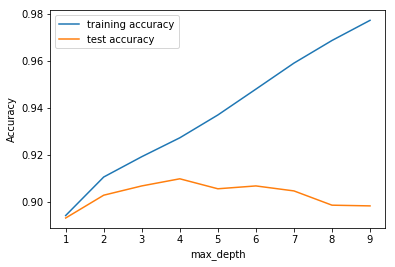

<Figure size 432x288 with 0 Axes>

In [55]:
# plotting accuracies with max_depth (code already written)
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('output/hyperparam.png')

In [56]:
# observe the optimal value of max_depth from the plot and store 
# in max_depth_optimal
max_depth_optimal = 4

In [57]:
# Build a tree with optimal max_depth
best_tree = DecisionTreeClassifier(max_depth=max_depth_optimal)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
#  Make predictions using test data
print(bank_test.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   33       122         4    999         0           1.4          93.444   
1   45       133         1    999         0          -1.8          92.893   
2   39       302         1    999         0           1.1          93.994   
3   49       602         1    999         0           1.4          93.918   
4   24       493         1    999         0           1.4          93.918   

   cons.conf.idx  euribor3m  nr.employed    ...     job  marital  education  \
0          -36.1      4.963       5228.1    ...       9        2          5   
1          -46.2      1.250       5099.1    ...       6        0          6   
2          -36.4      4.857       5191.0    ...       0        1          6   
3          -42.7      4.958       5228.1    ...       0        0          3   
4          -42.7      4.958       5228.1    ...       0        2          3   

   default  housing  loan  contact  month  day_of_week  poutco

In [59]:
# remember to drop 'id' from the test dataset 
predictions = best_tree.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

[0 0 0 0 0]


In [60]:
# Write the columns 'id' and 'predictions' into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

In [62]:
# Write the output
d.to_csv('output/bank_predictions.csv', sep=",")